In [ ]:
import sys
!{sys.executable} -m pip install --upgrade google-api-python-client google-auth-oauthlib google-auth-httplib2 ipyauth

In [96]:
import json
import uuid
from IPython.display import display_javascript, display_html, display
import requests

googleAppId = '422694994427-8vo76kqv7nm99v27dofkek56et6i2tp5.apps.googleusercontent.com'
googleSecret = '0PsnuDv1sPSv9CkpDlsc03Sz'

# FOR PRETTY JSON DISPLAY ONLY
def PRETTYJSON(json_data):
    if isinstance(json_data, dict) or isinstance(json_data, list):
        json_str = json.dumps(json_data)
    else:
        json_str = json_data
    str_uuid = str(uuid.uuid4())
    
    return display(json_str, str_uuid)

def display(json_str, str_uuid):
    display_html('<div id="{}" style="height: 600px; width:100%;font: 12px/18px monospace !important;"></div>'.format(str_uuid), raw=True)
    display_javascript("""
    require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        renderjson.set_show_to_level(2);
        document.getElementById('%s').appendChild(renderjson(%s))
    });
    """ % (str_uuid, json_str), raw=True)
    

# FOR YOUTUBE REQUEST
def get_youtube_request(token, url):        
    # Sample url
    # url = f'https://www.googleapis.com/youtube/v3/videos?part=statistics&id={video_id}'

    headers = {
        'Authorization': f'Bearer {token}',
        'Content-Type': 'application/json'
    }

    r = requests.get(url, headers=headers)
    
    return r.json()

# EXCHANGE CODE FOR TOKEN AND REFRESH TOKEN
# Redirect_uri must the same as the redirect_uri to the frontend where you requested the Authorization code
# Make sure that you have added 'http://127.0.0.1:3000/' to your Google OAuth client ID credentisl
def exchange_code_for_token(auth_code):
    # You must put valid Authorization code 
#     auth_code = "4/1AEM5AcWSjPljhXCMWdpZ0jF9QnmfFi7tzIZNlxAoKqGGmnX1e-hAhG_bf4kfWBcgvngEF91TGblNvDZfpQTmso"

    url = 'https://www.googleapis.com/oauth2/v4/token'

    data = {
        'code': auth_code,
        'client_id': googleAppId,
        'client_secret': googleSecret,
        'redirect_uri': 'http://127.0.0.1:3000/',
        'grant_type':"authorization_code",
    };

    r = requests.post(url , data=json.dumps(data))
    
    return r.json()

# REFRESH THE TOKEN
def yt_refresh_token(refresh_token):
    url = 'https://www.googleapis.com/oauth2/v4/token'

    data = {
        'client_id': googleAppId,
        'client_secret': googleSecret,
        'refresh_token': refresh_token,
        'grant_type': 'refresh_token'
    }
    
    
    r = requests.post(url , data=json.dumps(data))

    return r.json()

In [100]:
# # LET'S TRY EXCHANGE CODE FOR TOKEN
# response = exchange_code_for_token("4/1QHfEQtW5BXoW_qo3-r3j0y5En79zSjKUVonrE4duQJlgrl8bQqFJM7irj0rCNl0bOoXT3PBkuihL3cUpvlnnwc")
# access_token = response['access_token']
# refresh_token = response['refresh_token']

# # Display the response
# PRETTYJSON(response)

In [99]:
# REFRESH TOKEN
response = yt_refresh_token(refresh_token)
access_token = response['access_token']

# Display the response
PRETTYJSON(response)

In [75]:
yt_url = 'https://www.googleapis.com/youtube/v3/channels?part=contentDetails,snippet,status,statistics&mine=true'
# print(access_token)
response = get_youtube_request(access_token, yt_url)

# Display the response
PRETTYJSON(response)

In [79]:
# GETTING CHANNEL
# PART
#     auditDetails: 4
#     brandingSettings: 2
#     contentDetails: 2
#     contentOwnerDetails: 2
#     id: 0
#     invideoPromotion: 2 (deprecated)
#     localizations: 2
#     snippet: 2
#     statistics: 2
#     status: 2
#     topicDetails: 2
# REFERENCE: https://developers.google.com/youtube/v3/docs/channels/list

part = 'id,contentDetails,snippet,status,statistics'
yt_url = f'https://www.googleapis.com/youtube/v3/channels?part={part}&mine=true'

response = get_youtube_request(access_token, yt_url)

PRETTYJSON(response)

In [80]:
# GETTING ALL UPLOADED VIDEOS
# **part**: 

# - **`contentDetails`**: 2
# - **`id`**: 0
# - **`snippet`**: 2
# - **`status`**: 2
part = 'snippet'
upload_id = 'UU8iM3fmURtT60nLMS2U4a3g'
yt_url = f'https://www.googleapis.com/youtube/v3/playlistItems?part={part}&&playlistId={upload_id}'
response = get_youtube_request(access_token, yt_url)

PRETTYJSON(response)

In [88]:
# GETTING SPECIFIC VIDEOS STATISTICS
#   PART PARAMETERS
#     contentDetails: 2
#     fileDetails: 1
#     id: 0
#     liveStreamingDetails: 2
#     localizations: 2
#     player: 0
#     processingDetails: 1
#     recordingDetails: 2
#     snippet: 2
#     statistics: 2
#     status: 2
#     suggestions: 1
#     topicDetails: 2
# REFERENCE: https://developers.google.com/youtube/v3/docs/videos/list
    
playlist_item_id = 'VVU4aU0zZm1VUnRUNjBuTE1TMlU0YTNnLk9IUVBtdm9pS05V'
part = 'snippet'
url = f'https://www.googleapis.com/youtube/v3/videos?part={part}&playlistId={playlist_item_id}'

response = get_youtube_request(access_token, yt_url)

PRETTYJSON(response)

In [92]:
# FOR YOUTUBE VIDEOS
# PART
#     contentDetails: 2
#     fileDetails: 1
#     id: 0
#     liveStreamingDetails: 2
#     localizations: 2
#     player: 0
#     processingDetails: 1
#     recordingDetails: 2
#     snippet: 2
#     statistics: 2
#     status: 2
#     suggestions: 1
#     topicDetails: 2

video_id = 'OHQPmvoiKNU'
part = 'contentDetails,snippet,statistics'
yt_url = f'https://www.googleapis.com/youtube/v3/videos?part={part}&id={video_id}'
            

response = get_youtube_request(access_token, yt_url)

PRETTYJSON(response)

In [94]:
# # DIMENSIONS
# ageGroup , channel, country, day, gender, month, sharingService, uploaderType, video, 7DayTotals (deprecated, valid until April 15, 2020), 30DayTotals (deprecated, valid until April 15, 2020)

# # METRICS
# annotationClickThroughRate, annotationCloseRate, averageViewDuration, comments, dislikes, estimatedMinutesWatched, estimatedRevenue, likes, shares, subscribersGained, subscribersLost, viewerPercentage, views


dimension = "month"
startDate = "2020-01-01"
endDate = "2020-06-01"
metrics = "subscribersGained"

yt_url = f'https://youtubeanalytics.googleapis.com/v2/reports?dimensions={dimension}&endDate={endDate}&ids=channel%3D%3DMINE&metrics={metrics}&startDate={startDate}'

response = get_youtube_request(access_token, yt_url)

PRETTYJSON(response)

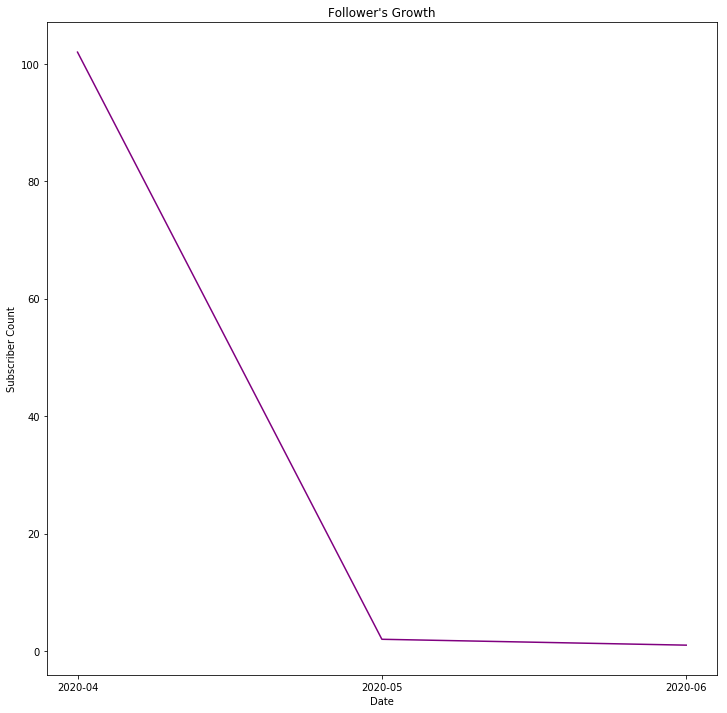

In [95]:
import matplotlib.pyplot as plt

data = response['rows']

x = [d[0] for d in data]
y = [d[1] for d in data]

#  Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(x,
        y,
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Subscriber Count",
       title="Follower's Growth")

plt.show()
